<h1 style = "text-align: center;"> Classification of Patients with Heart Failure </h1>

## Introduction

<p style = "font-size: 1.2em; line-height: 2.2;" > This project, predicts heart failure based on the patient clinical data. The data consists of 13 features and target to indicate patient survival. I used python programming language utilizing different packages that support machine learning modules and data analysis such as: pandas, seaborn, matplotlib, sklearn. This notebook consists of the following sections: </p>

<ol>
<h3 style = "font-size: 1.2em; line-height: 2.4;"> <li><a href = "#data">  Data Description  </a> </li> 
<li> <a href = "#eda"> Exploratory data analysis </a> </li>
<li> <a href = "#ml" > Machine Learning Module Implementation</a> </li>
<li> <a href = "#eval"> Algorithms Evaluation </a> </li> </h3>
</ol>

In [ ]:
import pandas as pd
import numpy as np 

## Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

## Machine Learning Libraries
from sklearn.metrics import recall_score, precision_score , accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB   ### Check this 
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix, classification_report
sns.set_theme(style="ticks")


<a id = "data" > <h1> Data Description </h1> </a>

<h2> General Description of the dataset </h2>
    
    
    
<p  style = "font-size: 1.2em; line-height: 2.2;"  >The data was collected as part of the study "Survival Analysis of Heart Failure Patients: A case study" [10] at the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. It consists of 299 patients of heart failure. The patients sufferd from left ventricular systolic dysfunction and falling in NYHA class III and IV [10].  </p>

In [ ]:
heart_failure =  pd.read_csv("HeartFailureData.csv")

In [ ]:
heart_failure.head()

In [ ]:
heart_failure.tail()

In [ ]:
heart_failure.describe()

<h2> Clinical Features </h2>

<p  style = "font-size: 1.2em; line-height: 2.2;" >This dataset consists of 13 features as shown in table below: </p>

<img src = "FeatureDescription.png"> </img>


<p>
Image Reference [10]: 
Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5
</p>

In [ ]:
heart_failure.info()

In [ ]:
## Checking for missing data
heart_failure.isnull().sum()

<a id = "eda"> <h1> Exploratory Data Analysis </h1> </a>

In [ ]:
plt.figure(figsize=(13,10))

## Correlation between features and death column
sns.heatmap(heart_failure.corr(),annot=True, fmt = ".2f", cmap = "BuPu_r")

In [ ]:
# Checking if the data is balnced or not. ### Not Balanced 

plt.figure(figsize=(13,10))
sns.histplot(heart_failure, x="Event")

In [ ]:
## Visualization of Age with gender in this data set 
plt.figure(figsize=(13,6))
g = sns.kdeplot(heart_failure["Age"][heart_failure["Event"] == 1], color="Red", shade = True)
g = sns.kdeplot(heart_failure["Age"][heart_failure["Event"] == 0], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g.legend(["Not Survived","Survived"])


## https://www.kaggle.com/gopalj/heart-fail-analysis-with-ensemble-modeling/notebook

In [ ]:
## Visualization of the features on dead and survived patients 
sns.displot(x='Sodium', data=heart_failure, kind= "kde" ,hue = "Event")
sns.displot(x='CPK', data=heart_failure, kind= "kde" ,hue = "Event")

In [ ]:
sns.displot( x='Ejection.Fraction', data=heart_failure, col= "Anaemia",kind= "kde" ,hue = "Event")
sns.displot( x='Creatinine', data=heart_failure, col= "Anaemia", kind= "kde" ,hue = "Event")

<a id = "ml"> <h1> Algorithms Implementation </h1> </a> 

In [ ]:
## Dividing the data into features and target 

target = heart_failure["Event"]
features = heart_failure.drop(["Event"] , axis= 1)

## Dividing the data into training and testing 

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.30)

## Number of Training Instances

print("Training Examples: ", len(feature_train))
print("Testing Examples: ", len(feature_test))

### Naive Bayes (NB)  -- GussianNB

In [ ]:
nb_classifier_gaussian = GaussianNB()

nb_pred = nb_classifier_gaussian.fit(feature_train, target_train).predict(feature_test)

In [ ]:
nb_classifier_gaussian.get_params(deep=True)

In [ ]:
nb_pred

### Support Vector Machine (SVM)

####  NuSVC 

In [ ]:
nu_svc_classifier= svm.NuSVC()
nu_svc_classifier.get_params(deep=True)

In [49]:
nu_svc_prediction = nu_svc_classifier.fit(feature_train, target_train).predict(feature_test)
nu_svc_prediction

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1], dtype=int64)

#### SVC

In [50]:
svc_model= svm.SVC(C = 0.0500)
svc_model.get_params(deep=True)

{'C': 0.05,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [51]:
svc_pred = svc_model.fit(feature_train, target_train).predict(feature_test)
svc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

<a id = "ml"> <h1> Evaluation </h1> </a>

<h2> The evaluation matrics are the following: </h2>
<ol>
<li> <b>Classification Accuracy:</b> Overall, how often is the classifier correct?; the proportion of the total number of predictions that were correct. </li>

<li><b>Sensitivity or Recall: </b> When the actual value is positive, how often is the prediction correct?; the proportion of actual positive cases which are correctly identified. </li>

<li><b>Specificity:</b> When the actual value is negative, how often is the prediction correct?; the proportion of actual negative cases which are correctly identified. </li>

<li><b>Precision:</b> When a positive value is predicted, how often is the prediction correct?; the proportion of positive cases that were correctly identified. </li>

</ol>

In [52]:
# TP = confusion[1, 1]
# TN = confusion[0, 0]
# FP = confusion[0, 1]
# FN = confusion[1, 0]

# sensitivity (recall) = TP / float(FN + TP)
# specificity = TN / (TN + FP)

### NB



              precision    recall  f1-score   support

           0       0.83      0.93      0.88        68
           1       0.64      0.41      0.50        22

    accuracy                           0.80        90
   macro avg       0.74      0.67      0.69        90
weighted avg       0.78      0.80      0.78        90



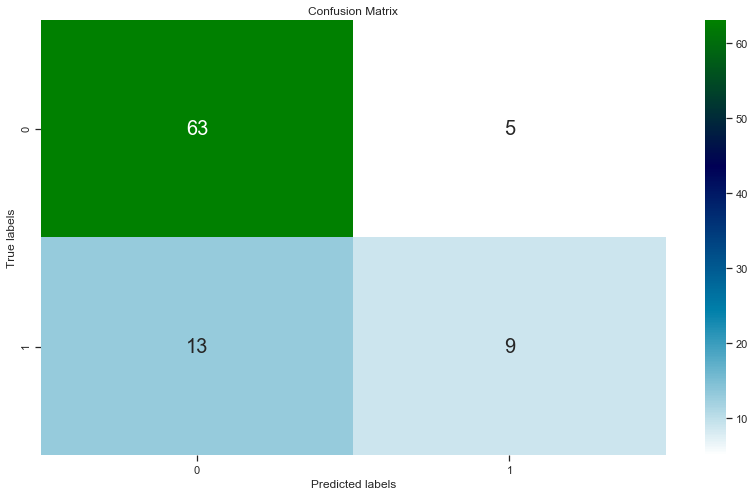

In [53]:
nb_conf_matrix = confusion_matrix(y_true=target_test, y_pred= nb_pred)
plt.figure(figsize= (14,8))
ax= plt.subplot()
sns.heatmap(nb_conf_matrix, annot= True ,annot_kws={"size": 20}, cmap= 'ocean_r', ax= ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
print("\n")
print(classification_report(y_true=target_test, y_pred= nb_pred))

In [54]:
nb_accuracy = accuracy_score(y_true=target_test, y_pred= nb_pred) 
nb_recall = recall_score(y_true=target_test, y_pred= nb_pred)
nb_prcison = precision_score(y_true=target_test, y_pred= nb_pred)
nb_sensitivity = nb_conf_matrix[1,1]/(nb_conf_matrix[1,0] + nb_conf_matrix[1,1]) ######################## Correct
nb_specificity = nb_conf_matrix[0,0]/(nb_conf_matrix[0,0] + nb_conf_matrix[0,1]) ######################## Correct
nb_evaluation_value = ["NB", nb_accuracy, nb_prcison, nb_recall, nb_specificity]
nb_evaluation_matric = ["Classifier", "Accuracy", "Percision", "Recall", "Specificity"]
print('NB Accuracy : ', nb_accuracy)
print('NB Recall (Sensitivity): ', nb_recall )
print('NB Prcison : ', nb_prcison)
print('NB Specificity : ', nb_specificity )

NB Accuracy :  0.8
NB Recall (Sensitivity):  0.4090909090909091
NB Prcison :  0.6428571428571429
NB Specificity :  0.9264705882352942


### SVM

              precision    recall  f1-score   support

           0       0.81      0.38      0.52        68
           1       0.28      0.73      0.40        22

    accuracy                           0.47        90
   macro avg       0.54      0.55      0.46        90
weighted avg       0.68      0.47      0.49        90



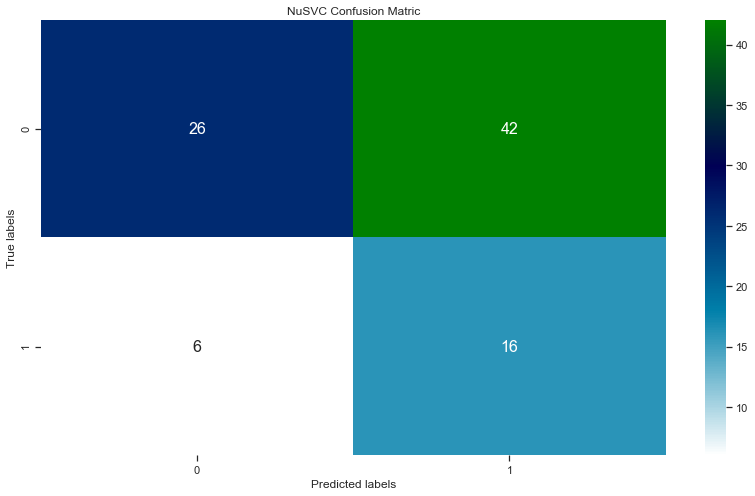

In [55]:
nu_svc_conf_matrix = confusion_matrix(y_true=target_test, y_pred= nu_svc_prediction)
plt.figure(figsize= (14,8))
ax= plt.subplot()
sns.heatmap(nu_svc_conf_matrix, annot= True ,annot_kws={"size": 16}, cmap= 'ocean_r', ax= ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title("NuSVC Confusion Matric")
print(classification_report(y_true=target_test, y_pred= nu_svc_prediction))

In [56]:
nu_svc_acc = accuracy_score(y_true=target_test, y_pred= nu_svc_prediction) 
nu_svc_recall = recall_score(y_true=target_test, y_pred= nu_svc_prediction)
nu_svc_percision = precision_score(y_true=target_test, y_pred= nu_svc_prediction)
nu_svc_specificity  = nu_svc_conf_matrix[0,0]/(nu_svc_conf_matrix[0,0] + nu_svc_conf_matrix[0,1])


nu_svc_evaluation_value = [ "NuSVC", nu_svc_acc, nu_svc_percision, nu_svc_recall, nu_svc_specificity]

print('NuSVC Accuracy : ', nu_svc_acc)
print('NuSVC Recall (Sensitivity): ', nu_svc_recall)
print('NuSVC Prcison : ', nu_svc_percision)
print('NuSVC Specificity : ', nu_svc_specificity)

NuSVC Accuracy :  0.4666666666666667
NuSVC Recall (Sensitivity):  0.7272727272727273
NuSVC Prcison :  0.27586206896551724
NuSVC Specificity :  0.38235294117647056


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        68
           1       0.00      0.00      0.00        22

    accuracy                           0.76        90
   macro avg       0.38      0.50      0.43        90
weighted avg       0.57      0.76      0.65        90



C:\Users\shima\Downloads\New_Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


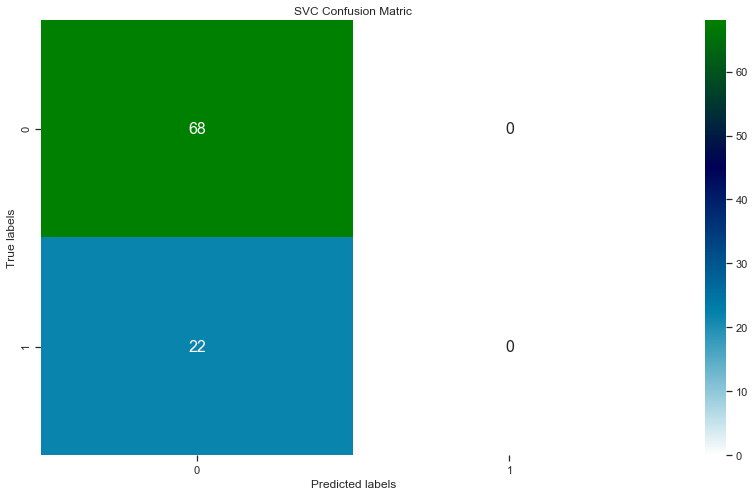

In [57]:
svc_conf_matrix = confusion_matrix(y_true=target_test, y_pred= svc_pred)
plt.figure(figsize= (14,8))
ax= plt.subplot()
sns.heatmap(svc_conf_matrix, annot= True ,annot_kws={"size": 16}, cmap= 'ocean_r', ax= ax)
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title("SVC Confusion Matric")
print(classification_report(y_true=target_test, y_pred= svc_pred))

In [58]:
svc_acc = accuracy_score(y_true=target_test, y_pred= svc_pred) 
svc_recall = recall_score(y_true=target_test, y_pred= svc_pred)
svc_percision = precision_score(y_true=target_test, y_pred= svc_pred)
svc_specificity = svc_conf_matrix[0,0]/(svc_conf_matrix[0,0] + svc_conf_matrix[0,1])

svc_evaluation_value = [ "SVC", svc_acc, svc_percision, svc_recall, svc_specificity]

print('SVC Accuracy : ', svc_acc)
print('SVC Recall (Sensitivity) : ', svc_recall)
print('SVC Prcison : ', svc_percision)
print('SVC Specificity : ', svc_specificity)

SVC Accuracy :  0.7555555555555555
SVC Recall (Sensitivity) :  0.0
SVC Prcison :  0.0
SVC Specificity :  1.0


C:\Users\shima\Downloads\New_Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
### Combining the matrics in one dataframe
df = pd.DataFrame([nb_evaluation_value, nu_svc_evaluation_value, svc_evaluation_value], 
                  columns= nb_evaluation_matric)
df

,Classifier,Accuracy,Percision,Recall,Specificity
0,NB,0.800000,0.642857,0.409091,0.926471
1,NuSVC,0.466667,0.275862,0.727273,0.382353
2,SVC,0.755556,0.000000,0.000000,1.000000


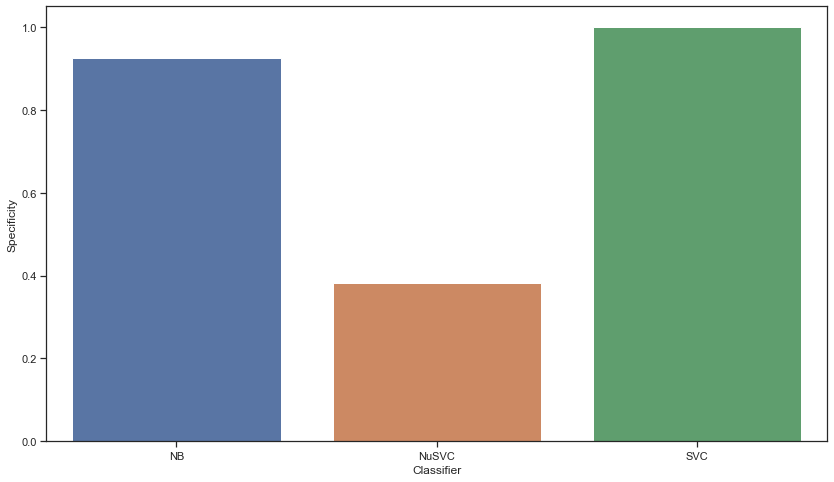

In [60]:
plt.figure(figsize= (14,8))
sns.barplot(x = "Classifier", y = "Specificity" , data= df)

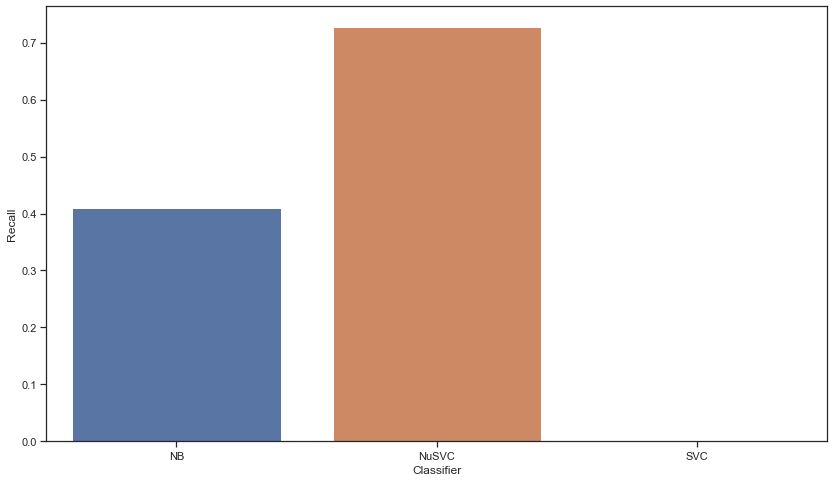

In [61]:
plt.figure(figsize= (14,8))
sns.barplot(x = "Classifier", y = "Recall" , data= df)

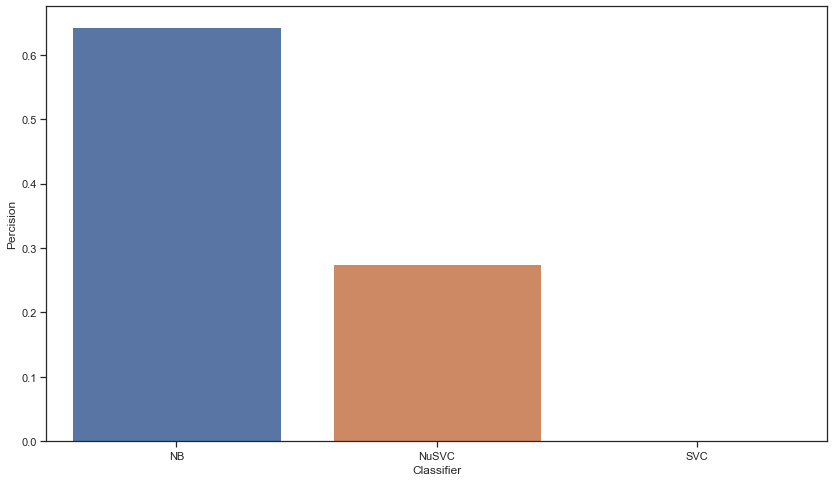

In [62]:
plt.figure(figsize= (14,8))
sns.barplot(x = "Classifier", y = "Percision" , data= df)

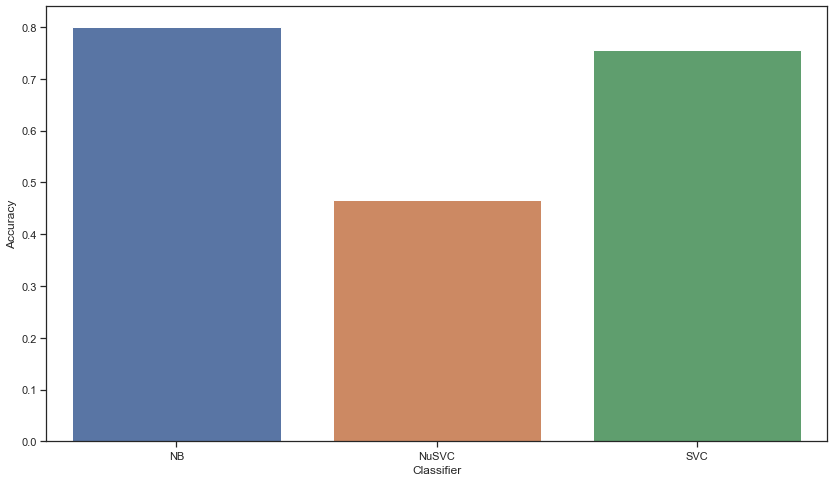

In [63]:
plt.figure(figsize= (14,8))
sns.barplot(x = "Classifier", y = "Accuracy" , data= df)

## References 

1. https://scikit-learn.org/stable/modules/naive_bayes.html#

2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

3. https://scikit-learn.org/stable/

4. https://scikit-learn.org/stable/modules/naive_bayes.html

5. https://scikit-learn.org/stable/modules/svm.html

6. https://statinfer.com/204-4-2-calculating-sensitivity-and-specificity-in-python/

7. https://www.ritchieng.com/machine-learning-evaluate-classification-model/

8. https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

9. Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5

10. Article Source: Survival analysis of heart failure patients: A case study
Ahmad T, Munir A, Bhatti SH, Aftab M, Raza MA (2017) Survival analysis of heart failure patients: A case study. PLOS ONE 12(7): e0181001. https://doi.org/10.1371/journal.pone.0181001